In [419]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [420]:
# !pip install pycaret

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from pycaret.classification import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier

In [422]:
train = pd.read_csv('/kaggle/input/loan-approval/train.csv')
test = pd.read_csv('/kaggle/input/loan-approval/test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [423]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [424]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [425]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [426]:
train['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

In [427]:
for i in train.columns:
    print(i, type(i), train[i].isnull().sum())

Loan_ID <class 'str'> 0
Gender <class 'str'> 13
Married <class 'str'> 3
Dependents <class 'str'> 15
Education <class 'str'> 0
Self_Employed <class 'str'> 32
ApplicantIncome <class 'str'> 0
CoapplicantIncome <class 'str'> 0
LoanAmount <class 'str'> 22
Loan_Amount_Term <class 'str'> 14
Credit_History <class 'str'> 50
Property_Area <class 'str'> 0
Loan_Status <class 'str'> 0


<Axes: >

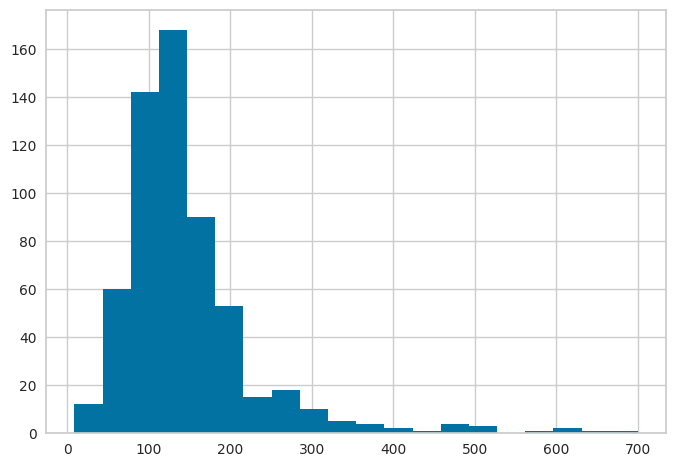

In [428]:
train['LoanAmount'].hist(bins=20)

In [429]:
def FillNA(df, cols_to_fill):
    for i in cols_to_fill:
        most_frequent_value = df[i].mode()[0]
        df[i].fillna(most_frequent_value, inplace=True)

    return df

train_cols_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 
                'Loan_Amount_Term', 'Credit_History']

test_cols_to_fill = ['Gender', 'Dependents', 'Self_Employed', 
                'Loan_Amount_Term', 'Credit_History']

train = FillNA(train, train_cols_to_fill)
test = FillNA(test, test_cols_to_fill)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['LoanAmount'] = np.log(train['LoanAmount'])

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['LoanAmount'] = np.log(test['LoanAmount'])

print(train.isnull().sum())
print()
print(test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [430]:
x = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area']

In [431]:
for i in x:
    print(i, train[i].unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Credit_History [1. 0.]
Property_Area ['Urban' 'Rural' 'Semiurban']


In [432]:
def OneHotEncode(df, cols_to_OHE):
    
    for i in cols_to_OHE:
        OneHotEncoded = pd.get_dummies(df[i], drop_first=True)
        OneHotEncoded = OneHotEncoded.astype(int)
        df = df.drop(i, axis=1)
        df = pd.concat([df, OneHotEncoded], axis=1)
        
    return df

train = OneHotEncode(train, x)
test = OneHotEncode(test, x)
train.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban
0,LP001002,5849,0.0,4.852030,360.0,1,1,0,0,0,0,0,0,1,0,1
1,LP001003,4583,1508.0,4.852030,360.0,0,1,1,1,0,0,0,0,1,0,0
2,LP001005,3000,0.0,4.189655,360.0,1,1,1,0,0,0,0,1,1,0,1
3,LP001006,2583,2358.0,4.787492,360.0,1,1,1,0,0,0,1,0,1,0,1
4,LP001008,6000,0.0,4.948760,360.0,1,1,0,0,0,0,0,0,1,0,1


In [433]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,4.857250,342.410423,0.687296,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.855049,0.379479,0.328990
std,6109.041673,2926.248369,0.495996,64.428629,0.463973,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.352339,0.485653,0.470229
min,150.000000,0.000000,2.197225,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,4.607658,360.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3812.500000,1188.500000,4.852030,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5795.000000,2297.250000,5.104426,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,6.551080,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [434]:
# c=1
# plt.figure(figsize=(12, 10))

# for i in train.columns[1:]:
#     ax = plt.subplot(7, 4,c)
#     c += 1
#     seaborn.boxplot(data = train, y=i)
# plt.tight_layout()

In [435]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [436]:
train = train.drop('Loan_ID', axis=1)
test_ID = test['Loan_ID']
test = test.drop('Loan_ID', axis=1)

In [437]:
train.columns

Index([  'ApplicantIncome', 'CoapplicantIncome',        'LoanAmount',
        'Loan_Amount_Term',       'Loan_Status',              'Male',
                     'Yes',                 '1',                 '2',
                      '3+',      'Not Graduate',               'Yes',
                       1.0,         'Semiurban',             'Urban'],
      dtype='object')

In [438]:
train.columns = train.columns.astype(str)
test.columns = test.columns.astype(str)

In [439]:
train.columns.values[6] = 'Married'
test.columns.values[5] = 'Married'

In [440]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Male', 'Married', '1', '2', '3+', 'Not Graduate',
       'Yes', '1.0', 'Semiurban', 'Urban'],
      dtype='object')

In [441]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Male', 'Married', '1', '2', '3+',
       'Not Graduate', 'Yes', '1.0', 'Semiurban', 'Urban'],
      dtype='object')

In [442]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

train['Balance'] = train['Total_Income']-(train['EMI']*1000)
test['Balance'] = test['Total_Income']-(test['CoapplicantIncome']*1000)

train.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)
test.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)
train.drop(['LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)
test.drop(['LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)

<Axes: xlabel='Balance', ylabel='Density'>

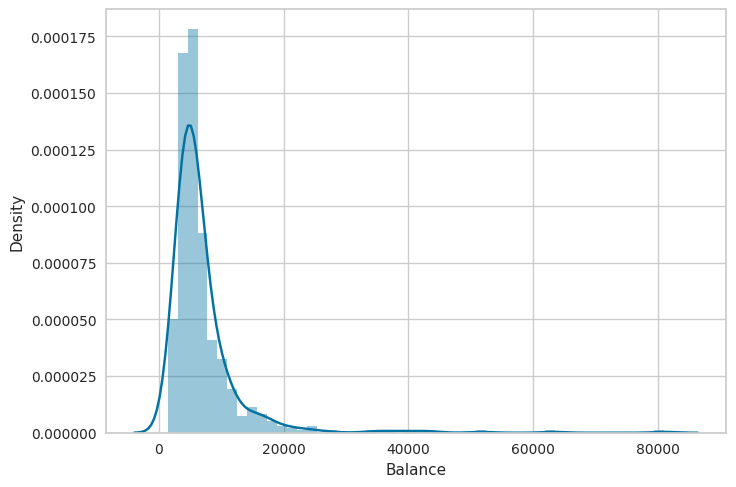

In [443]:
sns.distplot(train['Balance'])

In [444]:
train['Total_Income'] = np.log(train['Total_Income'])
test['Total_Income'] = np.log(train['Total_Income'])

In [445]:
#accuracy, precision, recall, f1

In [446]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [447]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [448]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [449]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.819672131147541


In [464]:
test_preds = LR.predict(test)

In [470]:
pd.read_csv('/kaggle/input/loan-approval/sample_submission.csv').head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [471]:
sub = pd.DataFrame({'Loan_Status':test_preds})
sub = sub.replace({0:'N', 1:'Y'})
sub

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,N
...,...
362,Y
363,Y
364,Y
365,Y


In [472]:
sub = pd.concat([test_ID, sub], axis=1)
sub

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [473]:
sub.to_csv('/kaggle/working/submissions.csv')

In [451]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7377049180327869


In [452]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7786885245901639


In [453]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7950819672131147


In [454]:
HGB = HistGradientBoostingClassifier()
HGB.fit(X_train, y_train)

y_pred = HGB.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7704918032786885


In [455]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7377049180327869


In [456]:
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train)

y_pred = ETC.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7868852459016393


In [450]:
# # Initialize the classification setup
# classification_setup = setup(data=train, target='Loan_Status', train_size=0.8)

# # Compare different classification models
# best_model = compare_models()